In [37]:
import fiona
import geopandas as gpd
from shapely.geometry import Point, Polygon
import shapely
import folium
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

We believe the simplest way to reduce the visual impact of outdoor advertising in cities is to reduce the number of advertisements in the most ad-crowded areas. We start by considering that the areas of Portugal with the highest density of outdoor advertisements are already too crowded. Our solution porposes the relocation of a number of advertisements from the most crowded areas to regions with untapped viewership potential. We also theorize that, even if absolute viewership decreases, having these billboards further away from other forms of advertising will increase their impact, all while keeping the overall impact in public spaces low.

#### Importing Parishes Shapefiles

!wget https://dados.gov.pt/s/resources/freguesias-de-portugal/20181112-195834/cont-aad-caop2017.zip -q
!unzip cont-aad-caop2017.zip

parishes = gpd.read_file("Cont_AAD_CAOP2017.shp")

In [42]:
parishes = gpd.read_file('Cont_AAD_CAOP2017.shp')

#### Importing Adevertisements Locations

!wget https://wdl-data.fra1.digitaloceanspaces.com/pse/outdoor_inventory.zip -q

!unzip outdoor_inventory.zip

In [45]:
ads = gpd.read_file("Cont_AAD_CAOP2017.shp")

#### Processing

In [46]:
parishes['area'] = parishes.geometry.to_crs({'init': 'epsg:3857'}).area/10**6

/home/primity/.miniconda3/envs/eruditio/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [50]:
bn = pd.read_csv('banner_numbers.csv')

In [52]:
pop = pd.read_csv('parishes_population.csv')

In [53]:
pop

,ordem,nivel,cod_dim2,Zona Geográfica,População residente - Total,População residente - H,População residente - M,População presente - Total,População presente - H,População presente - M,Famílias - Clássicas,Famílias - Institucionais,Núcleos familiares,Alojamentos familiares - Total,Alojamentos familiares - Clássicos,Alojamentos familiares - Não clássicos,Alojamentos colectivos,Edifícios clássicos
0,96349000,6,10101,Agadão,373,173,200,368,169,199,146,0,123,207,207,0,0,204
1,96374000,6,10102,Aguada de Baixo,1373,643,730,1322,611,711,478,1,431,622,622,0,3,574
2,96430000,6,10103,Aguada de Cima,4013,1943,2070,3806,1820,1986,1455,1,1265,2018,2014,4,2,1653
3,96580000,6,10104,Águeda,11346,5393,5953,11106,5217,5889,4382,5,3566,5860,5855,5,12,3485
4,96888000,6,10105,Barrô,1836,873,963,1792,851,941,653,1,596,842,840,2,1,784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,276730000,6,81504,Sagres,1909,943,966,2162,1075,1087,787,1,568,1580,1577,3,25,1349
4046,276827000,6,81505,Vila do Bispo,918,455,463,942,469,473,393,0,279,693,690,3,7,604
4047,276920000,6,81601,Vila Nova de Cacela,3902,1877,2025,4327,2111,2216,1598,1,1257,5570,5569,1,9,3780
4048,277102000,6,81602,Vila Real de Santo António,11946,5687,6259,11519,5463,6056,4656,4,3641,8026,8013,13,14,2720


In [36]:
df = df.merge(pop[['Zona Geográfica', 'População residente - Total']], left_on='Parish', right_on ='Zona Geográfica' ).drop(columns=['Zona Geográfica'])

In [37]:
df['banners_per_person'] = df['n_banners']/df['População residente - Total']

In [38]:
df.sort_values('banners_per_person', ascending = False).head(40)

,Unnamed: 0,Parish,n_banners,População residente - Total,banners_per_person
3,457,Paranhos,349,111,3.144144
182,781,Brufe,33,50,0.660000
41,1938,Custóias,130,202,0.643564
36,1522,Santa Justa,137,225,0.608889
129,35,Moita,51,103,0.495146
224,251,Lomba,25,57,0.438596
52,2328,Valongo,112,257,0.435798
14,391,Odivelas,222,542,0.409594
17,659,Rio Tinto,206,618,0.333333
115,1853,Valbom,60,214,0.280374


In [39]:
df = df.merge(parishes[['NAME_3', 'area', 'geometry']], left_on='Parish', right_on='NAME_3').drop(columns=['NAME_3'])

In [40]:
df['banners_per_km2']=df['n_banners']/df['area']

In [41]:
df.sort_values('banners_per_km2', ascending=False).head(30)

,Unnamed: 0,Parish,n_banners,População residente - Total,banners_per_person,area,geometry,banners_per_km2
50,1522,Santa Justa,137,225,0.608889,0.403478,"POLYGON ((-9.14348 38.71507, -9.14343 38.71517...",339.547590
48,1522,Santa Justa,137,891,0.153760,0.403478,"POLYGON ((-9.14348 38.71507, -9.14343 38.71517...",339.547590
193,2170,Sé,51,910,0.056044,0.196460,"POLYGON ((-9.12904 38.70831, -9.12914 38.70826...",259.594446
196,2170,Sé,51,3460,0.014740,0.196460,"POLYGON ((-9.12904 38.70831, -9.12914 38.70826...",259.594446
199,2170,Sé,51,10655,0.004786,0.196460,"POLYGON ((-9.12904 38.70831, -9.12914 38.70826...",259.594446
239,1369,Coimbra (São Bartolomeu),37,627,0.059011,0.287185,"POLYGON ((-8.43062 40.20590, -8.43090 40.20613...",128.836727
101,2167,São Paulo,92,2728,0.033724,0.719451,"MULTIPOLYGON (((-9.15312 38.70918, -9.15306 38...",127.875323
149,2164,São José,63,2746,0.022942,0.544973,"POLYGON ((-9.14784 38.71613, -9.14775 38.71621...",115.602126
99,2153,Santa Isabel,96,6875,0.013964,1.031560,"POLYGON ((-9.15423 38.71520, -9.15436 38.71514...",93.062968
175,2592,Vitória,52,1901,0.027354,0.579638,"POLYGON ((-8.61472 41.14289, -8.61497 41.14280...",89.711103


In [42]:
df['ban_norm']= (df['banners_per_km2']/(df['banners_per_km2'].max()+1))

In [43]:
df.ban_norm.describe()

count    5192.000000
mean        0.003939
std         0.032647
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.997064
Name: ban_norm, dtype: float64

"        \n        \nfor _, row in parishes.iterrows():\n    if row.geometry.geom_type == 'MultiPolygon':\n        for polygon in row.geometry:\n            plt.fill(*polygon.exterior.xy)\n    else:\n        plt.fill(*row.geometry.exterior.xy)\n"

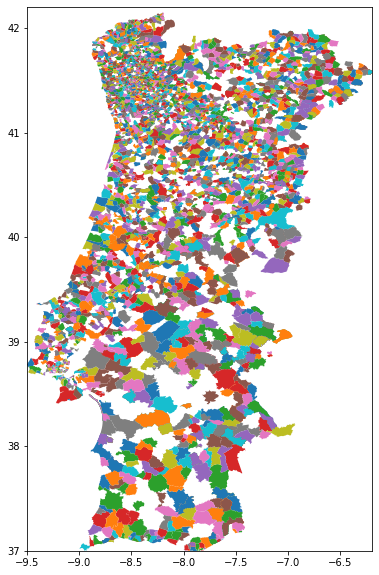

In [45]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# Whole Country
ax.set_xlim(-9.5, -6.2)
ax.set_ylim(37, 42.2)


ax.set_aspect(1)
patches = []


for _, row in df.iterrows():
    if row.geometry.geom_type == 'MultiPolygon':
        for polygon in row.geometry:
            plt.fill(*polygon.exterior.xy, alpha = 1-row.ban_norm)
    else:
        plt.fill(*row.geometry.exterior.xy,alpha = 1-row.ban_norm)
"""        
        
for _, row in parishes.iterrows():
    if row.geometry.geom_type == 'MultiPolygon':
        for polygon in row.geometry:
            plt.fill(*polygon.exterior.xy)
    else:
        plt.fill(*row.geometry.exterior.xy)
"""
    